<a href="https://colab.research.google.com/github/kirti131/Advance-DS-ML/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. FIND-S Algorithm (with CSV input)


In [ ]:
def find_s_algorithm(concepts, target):
    hypothesis = ['0'] * len(concepts[0])

    for i, val in enumerate(target):
        if val == 'Yes':
            hypothesis = concepts[i].copy()
            break

    for i, val in enumerate(target):
        if val == 'Yes':
            for attr in range(len(hypothesis)):
                if hypothesis[attr] != concepts[i][attr]:
                    hypothesis[attr] = '?'
    return hypothesis

# Sample training data
concepts = [
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change']
]
target = ['Yes', 'Yes', 'No', 'Yes']

hypothesis = find_s_algorithm(concepts, target)
print("Final hypothesis:", hypothesis)


Final hypothesis: ['Sunny', 'Warm', '?', 'Strong', '?', '?']


2. Candidate-Elimination Algorithm

In [ ]:


def candidate_elimination(concepts, target):
    specific = concepts[0].copy()
    general = [['?' for _ in range(len(specific))] for _ in range(len(specific))]

    for i, val in enumerate(target):
        if val == 'Yes':
            for j in range(len(specific)):
                if concepts[i][j] != specific[j]:
                    specific[j] = '?'
                    general[j][j] = '?'
        else:
            for j in range(len(specific)):
                if concepts[i][j] != specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = '?'

    general = [g for g in general if g != ['?' for _ in range(len(specific))]]
    return specific, general

concepts = [
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change']
]
target = ['Yes', 'Yes', 'No', 'Yes']

s_final, g_final = candidate_elimination(concepts, target)
print("S:", s_final)
print("G:", g_final)



S: ['Sunny', 'Warm', '?', 'Strong', '?', '?']
G: [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]



S: ['Sunny', 'Warm', '?', 'Strong', '?', '?']
G: [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


3. ID3 Algorithm – Decision Tree

Decision tree rules:


[Text(0.6, 0.875, 'Outlook <= 1.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = No'),
 Text(0.4, 0.625, 'Windy <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Yes'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Yes'),
 Text(0.6, 0.375, 'Outlook <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(0.7, 0.75, '  False')]

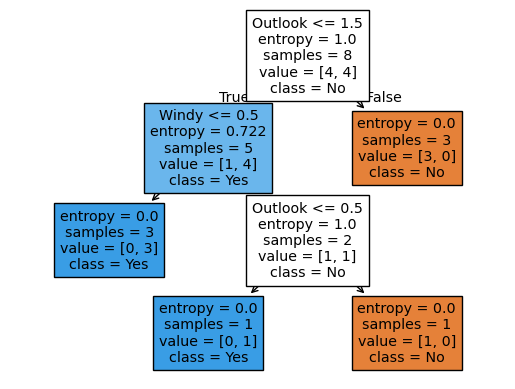

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Sample dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Mild', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High'],
    'Windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)

print("Decision tree rules:")
tree.plot_tree(model, feature_names=['Outlook', 'Temp', 'Humidity', 'Windy'], class_names=['No', 'Yes'], filled=True)


4. ANN with Backpropagation

In [ ]:
from sklearn.neural_network import MLPClassifier

X = [[0,0], [0,1], [1,0], [1,1]]
y = [0, 1, 1, 0]  # XOR

mlp = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000)
mlp.fit(X, y)

print("Predictions:")
for i in X:
    print(f"{i} => {mlp.predict([i])[0]}")




Predictions:
[0, 0] => 0
[0, 1] => 1
[1, 0] => 1
[1, 1] => 0


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


5. Naïve Bayes Classifier (Tabular)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = [[1, 20], [2, 21], [3, 22], [4, 23], [5, 24]]
y = [0, 0, 1, 1, 1]
test_X = [[1.5, 20.5], [3.5, 22.5]]
test_y = [0, 1]

model = GaussianNB()
model.fit(X, y)
predictions = model.predict(test_X)

print("Predictions:", predictions)
print("Accuracy:", accuracy_score(test_y, predictions))

Predictions: [0 1]
Accuracy: 1.0


6. Naïve Bayes Classifier (Text Documents)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score

docs = ["good product", "excellent quality", "bad experience", "poor service"]
labels = [1, 1, 0, 0]
test_docs = ["good quality", "poor experience"]
test_labels = [1, 0]

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(docs)
X_test = vectorizer.transform(test_docs)

model = MultinomialNB()
model.fit(X_train, labels)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(test_labels, predictions))
print("Precision:", precision_score(test_labels, predictions))
print("Recall:", recall_score(test_labels, predictions))



Accuracy: 1.0
Precision: 1.0
Recall: 1.0


7. Bayesian Network for Heart Disease (using pgmpy)

In [ ]:
!pip install pgmpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:

from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD



model = BayesianModel([('Age', 'HeartDisease'), ('Exercise', 'HeartDisease')])

cpd_age = TabularCPD(variable='Age', variable_card=2, values=[[0.6], [0.4]])  # 0: Young, 1: Old
cpd_exercise = TabularCPD(variable='Exercise', variable_card=2, values=[[0.7], [0.3]])  # 0: No, 1: Yes
cpd_hd = TabularCPD(
    variable='HeartDisease', variable_card=2,
    values=[[0.9, 0.8, 0.7, 0.4], [0.1, 0.2, 0.3, 0.6]],
    evidence=['Age', 'Exercise'], evidence_card=[2, 2]
)

model.add_cpds(cpd_age, cpd_exercise, cpd_hd)
model.check_model()

inference = VariableElimination(model)
result = inference.query(variables=['HeartDisease'], evidence={'Age': 1, 'Exercise': 0})
print(result)

ImportError: cannot import name 'BayesianModel' from 'pgmpy.models' (/usr/local/lib/python3.11/dist-packages/pgmpy/models/__init__.py)

8. EM Algorithm vs K-Means for Clustering

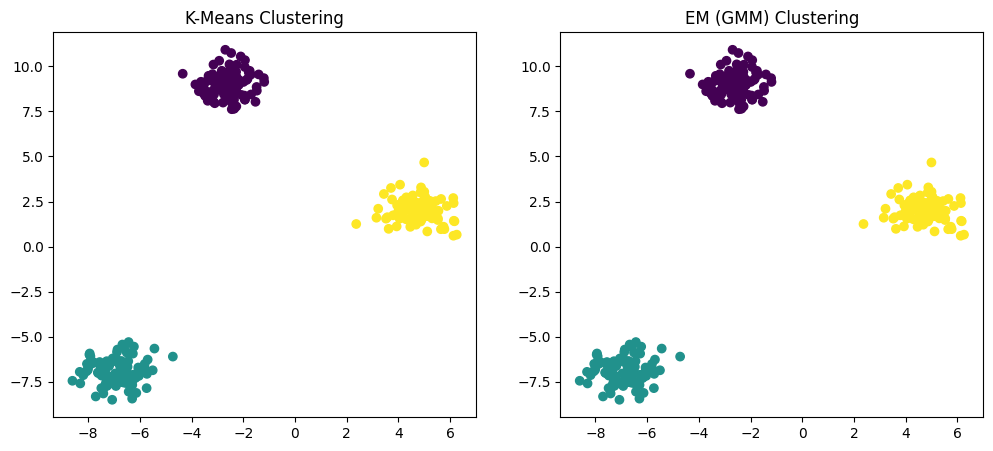

KMeans inertia: 277.7611800509626
GMM log likelihood: -3.155229645892771


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.70, random_state=42)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# EM Clustering using Gaussian Mixture
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
ax[0].set_title("K-Means Clustering")
ax[1].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
ax[1].set_title("EM (GMM) Clustering")
plt.show()

# Evaluation comment (optional)
print("KMeans inertia:", kmeans.inertia_)
print("GMM log likelihood:", gmm.lower_bound_)


9. K-Nearest Neighbour on Iris Dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=1)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Print correct and wrong predictions
for i in range(len(y_test)):
    actual = iris.target_names[y_test[i]]
    predicted = iris.target_names[predictions[i]]
    result = "✔️" if y_test[i] == predictions[i] else "❌"
    print(f"Test Sample {i + 1}: Predicted = {predicted}, Actual = {actual} {result}")

accuracy = (predictions == y_test).sum() / len(y_test)
print(f"\nAccuracy: {accuracy * 100:.2f}%")




Test Sample 1: Predicted = setosa, Actual = setosa ✔️
Test Sample 2: Predicted = versicolor, Actual = versicolor ✔️
Test Sample 3: Predicted = versicolor, Actual = versicolor ✔️
Test Sample 4: Predicted = setosa, Actual = setosa ✔️
Test Sample 5: Predicted = virginica, Actual = virginica ✔️
Test Sample 6: Predicted = versicolor, Actual = versicolor ✔️
Test Sample 7: Predicted = virginica, Actual = virginica ✔️
Test Sample 8: Predicted = setosa, Actual = setosa ✔️
Test Sample 9: Predicted = setosa, Actual = setosa ✔️
Test Sample 10: Predicted = virginica, Actual = virginica ✔️
Test Sample 11: Predicted = versicolor, Actual = versicolor ✔️
Test Sample 12: Predicted = setosa, Actual = setosa ✔️
Test Sample 13: Predicted = virginica, Actual = virginica ✔️
Test Sample 14: Predicted = versicolor, Actual = versicolor ✔️
Test Sample 15: Predicted = versicolor, Actual = versicolor ✔️
Test Sample 16: Predicted = setosa, Actual = setosa ✔️
Test Sample 17: Predicted = versicolor, Actual = versicol

10. Locally Weighted Regression (LWR / LOESS)

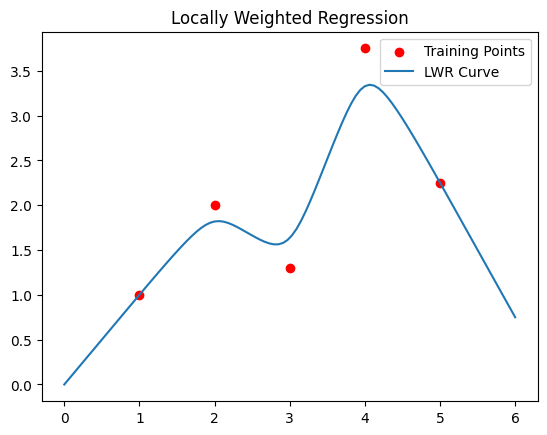

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_kernel(x, x_i, tau):
    return np.exp(-np.sum((x - x_i)**2) / (2 * tau**2))

def locally_weighted_regression(x_query, X, y, tau):
    m = X.shape[0]
    weights = np.array([gaussian_kernel(x_query, X[i], tau) for i in range(m)])
    W = np.diag(weights)

    X_bias = np.c_[np.ones((m, 1)), X]
    x_query_bias = np.r_[1, x_query]

    theta = np.linalg.pinv(X_bias.T @ W @ X_bias) @ X_bias.T @ W @ y
    return x_query_bias @ theta

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 1.3, 3.75, 2.25])

# Predict using LWR
x_range = np.linspace(0, 6, 100)
predictions = [locally_weighted_regression(np.array([x]), X, y, tau=0.5) for x in x_range]

# Plot
plt.scatter(X, y, color='red', label='Training Points')
plt.plot(x_range, predictions, label='LWR Curve')
plt.legend()
plt.title("Locally Weighted Regression")
plt.show()
